<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/Natural%20Language%20Processing/S_36/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing the dataset

In [2]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/Natural%20Language%20Processing/S_36/Restaurant_Reviews.tsv'

# get the dataset, delimiter \t for tsv file (tab), quoteing 3 to ignore dbl quote
dataset = pd.read_csv(fp, delimiter = '\t', quoting = 3)
print(dataset.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


## Cleaning the texts

In [84]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  # get all the stopwords from nltk
  all_stopwords = stopwords.words('english')
  # remove all the stopwords containing: no, not,nor,xxn't...
  pre_text = ' '.join(all_stopwords)
  pattern = r"\b(?:no|not|nor|\w+n't)\b"
  post_text = re.sub(pattern, '', pre_text)
  all_stopwords = post_text.split()
  # stemming
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# # get all the not related workds in stopwords lib
# pre_text = ' '.join(all_stopwords)
# pattern = r"\b(?:not|no|nor|\w+n't)\b"
# post_text = re.sub(pattern, '', pre_text)
# #all_stopwords = post_text.split()
# post_list = post_text.split()
# matches_pre = re.findall(pattern,pre_text,re.IGNORECASE)
# matches_post = re.findall(pattern,post_text,re.IGNORECASE)
# print(all_stopwords,post_list,sep='\n')

# # dc
# x = len(all_stopwords)
# y = len(post_list)
# n1 = len(matches_pre)
# n2 = len(matches_post)
# print(x,y,x-y,n1,n2,sep=';')


In [87]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid cou

## Creating the Bag of Words model

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [89]:
print(X.shape)

(1000, 1500)


## Splitting the dataset into the Training set and Test set

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [91]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



<function matplotlib.pyplot.show(close=None, block=None)>

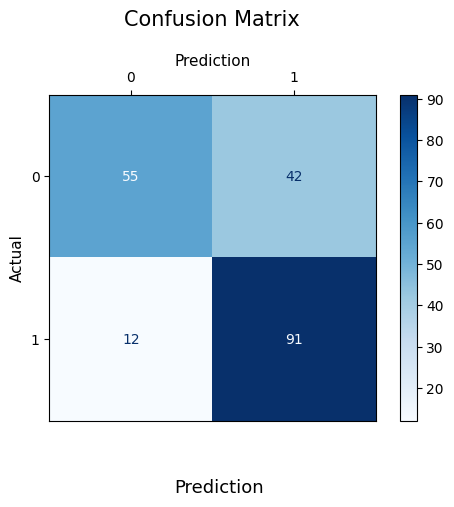

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

classes = classifier.classes_
#classes = ['Yes' 'No']

cm = confusion_matrix(y_test, y_pred, labels=classes)
#cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show